In [234]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import os
import pickle
import warnings
warnings.filterwarnings('ignore')

In [235]:
READ_PATH = "../data/models/"
EXPERIMENT_TYPE = 'norm_plot_original_ldc_0.5'

In [236]:
with open(READ_PATH+EXPERIMENT_TYPE+'.pickle', 'rb') as handle:
    read_file = pickle.load(handle)

## Get average statistics

In [170]:
clf_reports = read_file['clf_report']
average_precision = np.zeros(len(clf_reports))
average_recall = np.zeros(len(clf_reports))
average_f1 = np.zeros(len(clf_reports))
average_accuracy = np.zeros(len(clf_reports))

for i in range(len(clf_reports)):
    clf_report = clf_reports[i]
    average_precision[i] = clf_report['weighted avg']['precision']
    average_recall[i] = clf_report['weighted avg']['recall']
    average_f1[i] = clf_report['weighted avg']['f1-score']
    average_accuracy = clf_report['accuracy']

In [171]:
print('----------------------------------------------------------')
print('Model - ', EXPERIMENT_TYPE)
print('Average Precision - ',np.mean(average_precision))
print('Average Recall - ',np.mean(average_recall))
print('Average F1 - ',np.mean(average_f1))
print('Average Accuracy - ',np.mean(average_accuracy))
print('----------------------------------------------------------')

----------------------------------------------------------
Model -  ldc_0.45
Average Precision -  0.7639905172553847
Average Recall -  0.6345098039215686
Average F1 -  0.5779090830459279
Average Accuracy -  0.7058823529411765
----------------------------------------------------------


In [ ]:
----------------------------------------------------------
Model -  global_original_ldc_0.5
Average Precision -  0.6808470248126284
Average Recall -  0.60921875
Average F1 -  0.5638739601449739
Average Accuracy -  0.6041666666666666
----------------------------------------------------------

## File Change analysis

### File change trend

In [112]:
random_file_changes = np.random.choice(np.arange(len(read_file['file_change'])),size=10)

In [113]:
random_files = np.array(read_file['file_change'])[random_file_changes]

Text(0.5, 1.0, '% Change in files vs Iterations for 10 Random iterations')

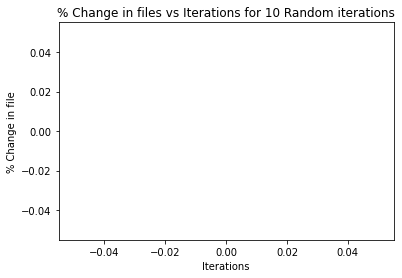

In [114]:
for elem in random_files:
    plt.plot(np.arange(len(elem)-1), elem[1:])
plt.xlabel('Iterations')
plt.ylabel('% Change in file')
plt.title('% Change in files vs Iterations for 10 Random iterations')
# plt.savefig('../data/plots/file_change_10_random_'+EXPERIMENT_TYPE+'.png')

### Histogram of no. of iterations for convergence

In [93]:
len_array = np.zeros(len(read_file['file_change']))
for i in range(len(read_file['file_change'])):
    len_array[i] = len(read_file['file_change'][i])

In [98]:
len_array_uq = np.unique(len_array, return_counts=True)

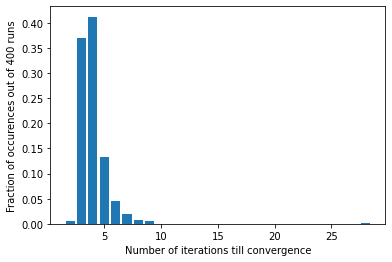

In [107]:
plt.bar(len_array_uq[0], len_array_uq[1]/400)
plt.xlabel('Number of iterations till convergence')
plt.ylabel('Fraction of occurences out of 400 runs')
# plt.savefig('../data/plots/convergence_bar_'+EXPERIMENT_TYPE+'.png')

# Speaker variations in the dataset

In [172]:
DF_PATH = "../data/dataframes/"
temp_df = pd.read_pickle(DF_PATH+'temp_df.pkl')

In [174]:
gb = temp_df.groupby('speaker')

In [180]:
selected_speeches = []
for name, group in gb:
    speech_gb = group.groupby('speech_type')
    for sgb_name, sgb_group in speech_gb:
        selected_speeches.append(sgb_group.sample(n=1))

In [181]:
selected_speeches = pd.concat(selected_speeches).reset_index(drop=True)

In [203]:
selected_speeches_0 = selected_speeches[selected_speeches['speech_type']==1]
test = selected_speeches_0.sample(n=4)

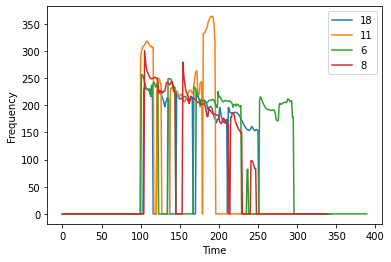

In [205]:
for index, row in test.iterrows():
    plt.plot(np.arange(len(row['F0_contour'])), row['F0_contour'], label = row['speaker'])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.savefig('../data/plots/speaker_variability.png')

# Iteration Analysis

In [237]:
clf_reports = read_file['clf_report']

In [238]:
accuracy_arrays =[]
for elem in clf_reports:
    l = []
    for e in elem:
        l.append(e['accuracy'])
    accuracy_arrays.append(l)

In [239]:
max_len = 0
for elem in accuracy_arrays:
    if len(elem) > max_len:
        max_len = len(elem)

In [240]:
final_array = []
for elem in accuracy_arrays:
    arr = elem
    if len(elem) < max_len:
        to_add = max_len - len(elem)
        for i in range(to_add):
            arr.append(elem[-1])
    final_array.append(arr)

In [241]:
trajectory = np.mean(np.array(final_array), axis=0)
x_axis = np.arange(len(trajectory))

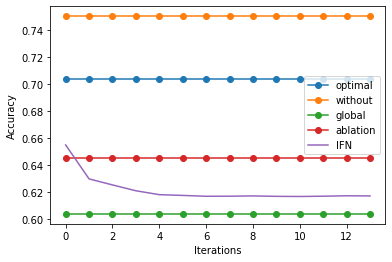

In [244]:
plt.plot(x_axis, np.full(shape=len(x_axis), fill_value=0.704), label = 'optimal', marker='o')
plt.plot(x_axis, np.full(shape=len(x_axis), fill_value=0.75), label = 'without', marker='o')
plt.plot(x_axis, np.full(shape=len(x_axis), fill_value=0.604), label = 'global', marker='o')
plt.plot(x_axis, np.full(shape=len(x_axis), fill_value=0.645), label = 'ablation', marker='o')
plt.plot(x_axis, trajectory, label = 'IFN', )
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.savefig('../data/plots/iteration_accuracy.png')